<a href="https://colab.research.google.com/github/ElenaPocaterra/MLNPS2021/blob/main/NNDL/April2021_autoencode_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import glob
import pylab as pl
from PIL import Image

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ndim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 1. change kernel to GPU 
go to runtime -> change runtime type -> GPU

# digits first

(28, 28)
784


(60000, 28, 28)

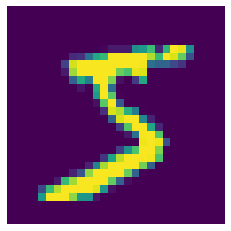

In [29]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
print(intialshape)
print(ndim)
x_train.shape

In [30]:
x_train.dtype, x_train.max(), x_train.min()


(dtype('uint8'), 255, 0)

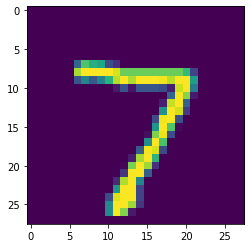

In [31]:
pl.imshow(x_test[0])

In [32]:
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# create a model

In [33]:
keras.models?

In [34]:
Dense?

In [35]:
model_digits64 = Sequential()
## encoder
# input layer and the output size
model_digits64.add(Dense(128, activation='relu',batch_size = None, input_dim=784)) #input_dim per importare immagine appiattita(1D). input_shape per importare immagine 2D.
#compression layer
model_digits64.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))


#alternative syntax
"""
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
"""

'\nencoded = Dense(encoding_dim, activation=\'relu\')(input_img)\n# "decoded" is the lossy reconstruction of the input\ndecoded = Dense(784, activation=\'sigmoid\')(encoded)\n\nautoencoder = Model(input_img, decoded)\n\nencoder = Model(input_img, encoded)\n\n# create a placeholder for an encoded (32-dimensional) input\nencoded_input = Input(shape=(encoding_dim,))\n# retrieve the last layer of the autoencoder model\ndecoder_layer = autoencoder.layers[-1]\n# create the decoder model\ndecoder = Model(encoded_input, decoder_layer(encoded_input))\n'

In [38]:
	
#need to choose the loss function, metric, optimization scheme
model_digits64.compile(optimizer='adam', loss='mean_squared_error')
 
#need to learn what to look for - always plot the loss function!
model_digits64.fit(x_train, x_train, validation_data=(x_test, x_test),
                     epochs=20, batch_size=100, verbose=1)
#note that the model allows to give a validation test, 
#this is for a 3fold cross valiation: train-validate-test 


Epoch 1/20
600/600 [==============================] - 5s 3ms/step - loss: 0.0433 - val_loss: 0.0164
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0160 - val_loss: 0.0141
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0142 - val_loss: 0.0132
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0135 - val_loss: 0.0129
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0131 - val_loss: 0.0127
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0130 - val_loss: 0.0127
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0130 - val_loss: 0.0126
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0129 - val_loss: 0.0125
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0128 - val_loss: 0.0124

In [40]:
#predict
test_y_predictions = model_digits64.predict(x_test)

In [41]:
test_y_predictions

array([[ 2.6182453e-03, -1.3400898e-03,  7.9587754e-04, ...,
        -6.8960199e-04,  6.7509571e-04,  3.1245686e-04],
       [-2.8862220e-03, -9.6921809e-04, -1.2827571e-04, ...,
        -3.2892451e-05, -4.1239299e-03,  1.0939906e-03],
       [ 1.2044120e-03,  6.5704295e-04, -3.2154657e-04, ...,
        -1.9797776e-04, -4.1551189e-04,  4.6685338e-04],
       ...,
       [-1.0875682e-03, -2.9337872e-04,  5.8987364e-04, ...,
        -7.1857683e-04, -9.2454674e-04,  6.8031112e-04],
       [-2.4550981e-03, -3.9136149e-03,  2.6257080e-03, ...,
        -1.4620367e-03, -1.3054451e-03, -9.3648676e-05],
       [-7.0862751e-04, -3.1852489e-04,  8.7957829e-05, ...,
        -1.1509368e-03, -2.9061069e-03,  1.2100749e-03]], dtype=float32)

In [43]:
test_y_predictions.shape

(10000, 784)

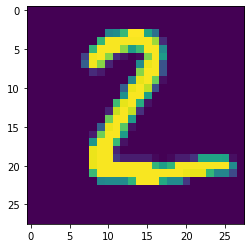

In [47]:
pl.imshow(x_test[1].reshape(28,28))

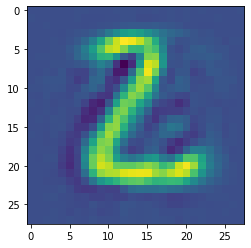

In [48]:
pl.imshow(test_y_predictions[1].reshape(28,28))

### regression
- loss='mean_squared_error' L2: default loss to use for regression problems. => linear activation function in output layer, one node out

alternatives:  loss='mean_squared_logarithmic_error', 'mean_absolute_error' (which is L1 instead of L2)
### binary classification

- loss='binary_crossentropy' => sigmoid activation function in output layer, one node out

alternatives: 'hinge'

### multiclass classification
categorical encoded as numerical
- loss='categorical_crossentropy' => softmax n nodes out

onehot encoded categoridal
- 'parse_categorical_crossentropy' => softmax n nodes out

- 'kullback Leibler Divergence Loss' => probabilistic categorical classification; log(P/Q)

## optimizers
- SGD: stocastic gradient descent 
    - nesterov=True -> momentum inclusion
- adam: Adaptive moment estimation. **good in most cases**
- adagrad: different steps for different parameters based on frequency (binary input) well-suited for dealing with sparse data.

- adaDelta: like adagrad but compensated for vanishing learning rate problem

momentum refers to looking one step back and make a decision that includes the slope there

### parameter:
generally you need to adjust the learning rate which is how much you change the parameters by at each step. 
keras.optimizers.Adam(lr=0.001)


https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif

In [36]:
# choose the optimizer and loss appropriately!
model_digits64.compile(....

SyntaxError: ignored

In [ ]:
print(model_digits64.summary())

In [ ]:
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=..., batch_size=100, verbose=1)

# always look at the loss!

In [ ]:
pl.plot(np.array(history64.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

The loss fuctionis plotted and because it is still decreasingn quite rapidly (slope of the curve not near 0 yet) I know I did not run enough epochs. Try and run for 200 epochs!

# predict

In [ ]:
output_image64 = model_digits64.predict(x_test)

In [ ]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


In [ ]:
for i in range(10):
  compareinout(i, output_image64, x_test)

This is a rather bad result. Let me see if I can improve it . The images are too detailed. I can treat the problem as a binary problem to derice some detail. To approach a binary classifier I switch the activation function in the last layer to sigmoid

# change loss function

In [ ]:
# choose the optimizer and loss appropriately!
model_digits64_sig = Sequential()
## encoder.....
model_digits64_sig.add(Dense(ndim, activation=...
model_digits64_sig.compile(optimizer="adadelta", loss=...

In [ ]:
history64_sig = model_digits64_sig.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=..., batch_size=100, verbose=1)

In [ ]:
pl.plot(np.array(history64_sig.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

The loss fuctionis plotted and because it is still decreasingn quite rapidly (slope of the curve not near 0 yet) I know I did not run enough epochs. Try and run for 200 epochs!

In [ ]:
output_image64_sig = model_digits64_sig.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_sig, x_test)

Much better! Let me choose a loss fuctio that is more appropriate for a nbinary classificaton.

In [ ]:
# sigmoid and binary cross entropy loss
model_digits64_bce = model_digits64_sig

In [ ]:
model_digits64_bce.compile(optimizer="adadelta", loss="binary_crossentropy")
history64_bce = model_digits64_bce.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=..., batch_size=100, verbose=1)

In [ ]:
pl.plot(np.array(history64_bce.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

This loss fuction is also decreasing to steeply. Too few epochs!

In [ ]:
output_image64_bce = model_digits64_bce.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_bce, x_test)

This is a pretty good result!

In [ ]:
pl.plot(np.array(history64.history['loss']), label="linear")
pl.plot(np.array(history64_sig.history['loss']), label="sigmoid")
pl.plot(np.array(history64_bce.history['loss']), label="bce")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
pl.title("the 3 loss functions")
pl.figure()
pl.plot(np.array(history64.history['loss']), label="linear")
pl.plot(np.array(history64_sig.history['loss']), label="sigmoid")
pl.plot(np.array(history64_bce.history['loss']), label="bce")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.xscale('log')
pl.yscale('log')
pl.legend()
pl.title("the 3 loss functions, log scale")

All loss functions plotted: topin natural, bottomin logscale for enhanced visibility. It does not look like any of them is done learning (all decreasing rapidly still), especially the one for the the sigmoid-based mean square error loss.

# try more compression

Now we shrink the bottle neck to 16 neurons: a much more ambitions model!

In [ ]:
model_digits = Sequential()
#encoder...
#bottle neck
model_digits.add(Dense(16, activation='relu'))
#decoder...
model_digits.add(Dense(ndim, activation='sigmoid'))


In [ ]:
model_digits.compile(optimizer="adadelta", loss="binary_crossentropy")

In [ ]:
print(model_digits.summary())

In [ ]:
history = model_digits.fit(x_train, x_train, epochs=200, batch_size=100, verbose=1)

In [ ]:
pl.plot(np.array(history.history['loss']))
pl.yscale('log')
pl.xscale('log')

the loss fuction: once again it did not finish learning. 

In [ ]:
output_image = model_digits.predict(x_test)

for i in range(10):
  compareinout(i, output_image, x_test)

The result is not bad! The decoder can recreate the image from only 16 numbers!

# Extract feature

In [ ]:
from keras import backend as K
# input placeholder
inp = model_digits.input                   
# extract the bottle neck outputs
outputs = model_digits.layers[3].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    

# Testing
layer_outs = functors(x_test[:1])
pl.imshow(layer_outs[0]);

This is the reducted representation of the first image in the test sample: a 16-values representation of the NxN pixel image

In [ ]:
def compareinout_encoded(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(131) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(132)
  pl.imshow(functors(testimg[i:i+1])[0])
  pl.yticks([])
  ax = fig.add_subplot(133) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


In [ ]:
for i in range(10):
  compareinout_encoded(i, output_image, x_test)

*left*: original image

*center*: compressed representation

right: predicted image